<a href="https://colab.research.google.com/github/Darshan2104/CE_135_Darshan_Tank_ML/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
 'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
 'False', 'False', 'False', 'True', 'True', 'False', 'True']
#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']


In [4]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
Outlookenc = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)
Temperatureenc = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)
Humidityenc = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)
Windenc = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)
Playenc = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)
print("Weather:" ,Outlookenc)
print("Temerature:" ,Temperatureenc)
print("Humidity:" ,Humidityenc)
print("Wind:" ,Windenc)
print("\n")
print("Play:" ,Playenc)


Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}
Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]


Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [5]:
fe = tuple(zip(Outlookenc,Temperatureenc ,Humidityenc ,Windenc))
print("Features : ",fe)

Features :  ((1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1))


In [8]:
x_train, x_test, y_train, y_test = train_test_split(fe, Playenc, test_size=0.1, random_state=63)

In [9]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
#calculate accuracy
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.5


In [10]:
y_pred_example = clf.predict([[1,2,1,0],[2,0,0,1]])
print("y predicted : ",y_pred_example)

y predicted :  [1 0]


In [11]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[0, 1],
       [0, 1]])

In [12]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
print('precision: {}'.format(precision))
#calcu;ate recall and precision
print('recall: {}'.format(recall))

precision: 0.5
recall: 1.0


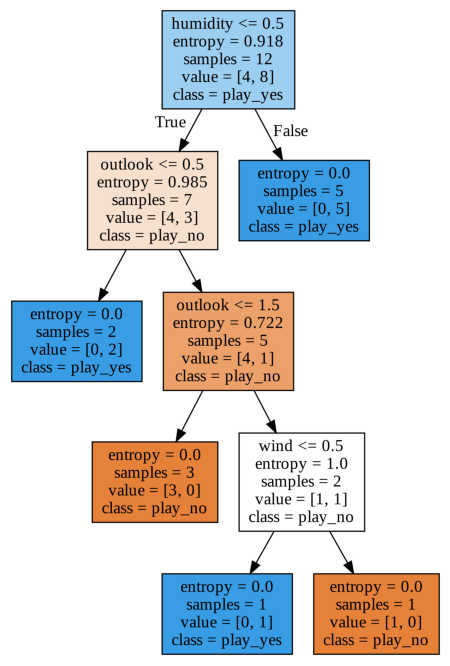

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='tree_entropy.dot',
  feature_names=['outlook','temperature','humidity','wind'],
  class_names=['play_no','play_yes'], 
  filled=True)
#png convert
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])
import matplotlib.pyplot as plt
plt.figure(figsize = (9, 12))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();

In [14]:
from sklearn.datasets import load_breast_cancer
X,y = load_breast_cancer(return_X_y=True)

In [15]:
print("Features shape : ",X.shape)
print("Label shape: ",y.shape)

Features shape :  (569, 30)
Label shape:  (569,)


In [16]:
label = ['Benign','Malignant']
print(label[y[0]])

Benign


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=63)

In [19]:
classfr = DecisionTreeClassifier()
classfr.fit(x_train, y_train)
y_pred = classfr.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9517543859649122


In [20]:
#confusion matrix creation
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 84,   8],
       [  3, 133]])

In [21]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

precision: 0.9432624113475178
recall: 0.9779411764705882


In [22]:
y_pred = classfr.predict(X[20].reshape(1,-1))
print("Predicted : ",label[int(y_pred)])
print("Actual : ",label[y[20]])

Predicted :  Malignant
Actual :  Malignant


In [25]:
# feature_names
load_breast_cancer().feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

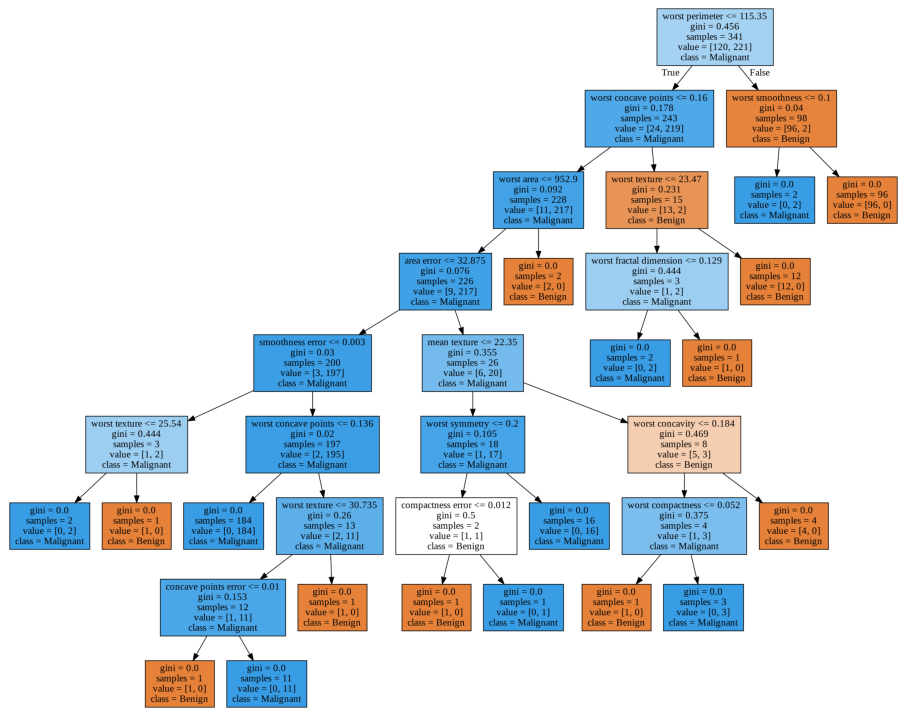

In [26]:
from sklearn.tree import export_graphviz
export_graphviz(classfr,out_file='tree_entropy.dot',
               feature_names=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                              'mean smoothness', 'mean compactness', 'mean concavity',
                              'mean concave points', 'mean symmetry', 'mean fractal dimension',
                              'radius error', 'texture error', 'perimeter error', 'area error',
                              'smoothness error', 'compactness error', 'concavity error',
                              'concave points error', 'symmetry error',
                              'fractal dimension error', 'worst radius', 'worst texture',
                              'worst perimeter', 'worst area', 'worst smoothness',
                              'worst compactness', 'worst concavity', 'worst concave points',
                              'worst symmetry', 'worst fractal dimension'],
               class_names=['Benign','Malignant'], 
               filled=True)

#png convert
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

#Display
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 20))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();